# World Population 2022 Analysis

-----

### Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
import missingno as msn
import sweetviz as sv

sns.set_style('darkgrid')
warnings.filterwarnings('ignore')
%matplotlib inline
# plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['figure.dpi'] = 120
plt.rcParams['font.size'] = 14

### Load the Dataset

The dataset can be found at [Kaggle](https://www.kaggle.com/datasets/anandhuh/countries-in-the-world-by-population-2022)

In [2]:
df = pd.read_csv('world_population.csv')
df.head(10)

,Country/Other,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,Afghanistan,38928346,2.33,886592,60,652860,-62920,4.6,18,25.0,0.50
1,Albania,2877797,-0.11,-3120,105,27400,-14000,1.6,36,63.0,0.04
2,Algeria,43851044,1.85,797990,18,2381740,-10000,3.1,29,73.0,0.56
3,Angola,32866272,3.27,1040977,26,1246700,6413,5.6,17,67.0,0.42
4,Antigua and Barbuda,97929,0.84,811,223,440,0,2.0,34,26.0,0.00
5,Argentina,45195774,0.93,415097,17,2736690,4800,2.3,32,93.0,0.58
6,Armenia,2963243,0.19,5512,104,28470,-4998,1.8,35,63.0,0.04
7,Aruba,106766,0.43,452,593,180,201,1.9,41,44.0,0.00
8,Australia,25499884,1.18,296686,3,7682300,158246,1.8,38,86.0,0.33
9,Austria,9006398,0.57,51296,109,82409,65000,1.5,43,57.0,0.12


### Basic Information

In [3]:
# Shape
df.shape

(201, 11)

In [4]:
# Check duplicate
df.duplicated().any()

False

- The dataset has 201 rows and 11 attributes.
- No duplicate values.
- In the `Country/Other` column some entries seems to contain multiple Countries.

In [5]:
# info of attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country/Other      201 non-null    object 
 1   Population (2020)  201 non-null    int64  
 2   Yearly Change      201 non-null    float64
 3   Net Change         201 non-null    int64  
 4   Density (P/Km²)    201 non-null    int64  
 5   Land Area (Km²)    201 non-null    int64  
 6   Migrants (net)     201 non-null    int64  
 7   Fert. Rate         201 non-null    float64
 8   Med. Age           201 non-null    int64  
 9   Urban Pop %        194 non-null    float64
 10  World Share        201 non-null    float64
dtypes: float64(4), int64(6), object(1)
memory usage: 17.4+ KB


In [6]:
# Description of data
df.describe()

,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
count,2.010000e+02,201.000000,2.010000e+02,201.000000,2.010000e+02,201.000000,201.000000,201.000000,194.000000,201.000000
mean,3.877661e+07,1.200299,4.046234e+05,361.711443,6.450903e+05,-5.442786,2.692040,30.621891,59.634021,0.497463
std,1.454245e+08,1.091574,1.210610e+06,1710.321831,1.809408e+06,123292.057588,1.264253,9.119557,22.226695,1.865678
min,9.792900e+04,-2.470000,-3.838400e+05,2.000000,3.000000e+01,-653249.000000,1.100000,15.000000,13.000000,0.000000
25%,1.886198e+06,0.420000,4.103000e+03,34.000000,2.164000e+04,-10047.000000,1.700000,22.000000,43.000000,0.020000
50%,8.654622e+06,1.080000,6.040300e+04,89.000000,1.085600e+05,-960.000000,2.300000,30.000000,60.000000,0.110000
75%,2.769102e+07,1.960000,3.602040e+05,228.000000,4.988000e+05,9741.000000,3.600000,39.000000,78.750000,0.360000
max,1.439324e+09,3.840000,1.358663e+07,21645.000000,1.637687e+07,954806.000000,7.000000,48.000000,100.000000,18.470000


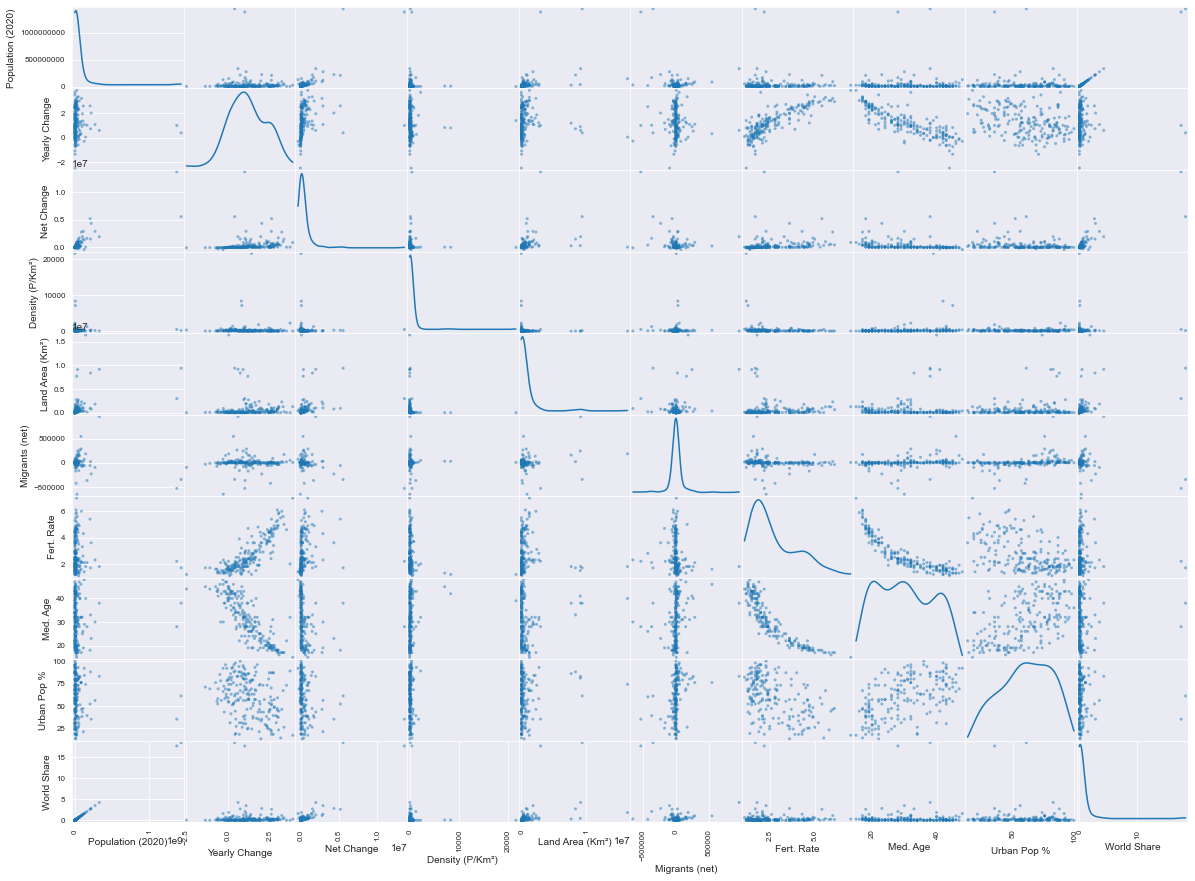

In [13]:
# scatter matrix
pd.plotting.scatter_matrix(df, figsize=(20,15), diagonal='kde')
plt.show()

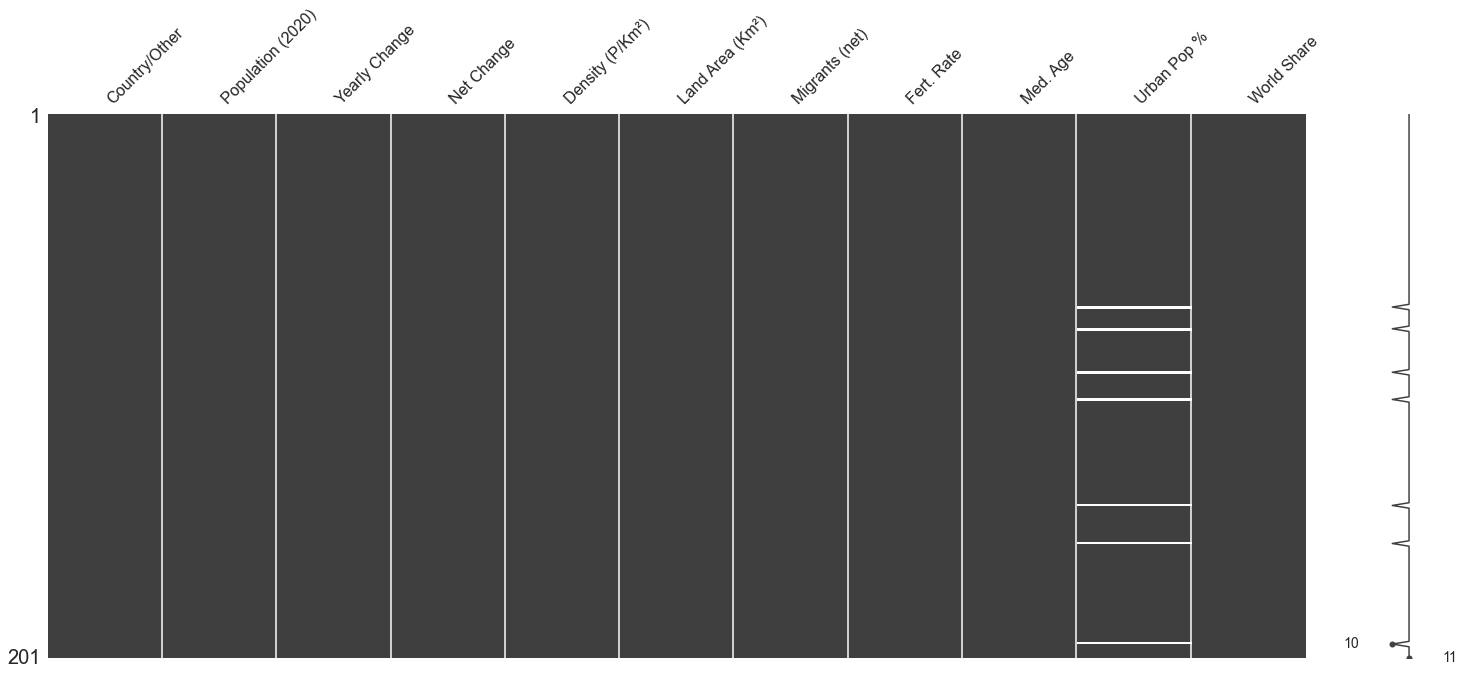

In [7]:
# check for missing values
msn.matrix(df);

In [8]:
df.isna().sum()

Country/Other        0
Population (2020)    0
Yearly Change        0
Net Change           0
Density (P/Km²)      0
Land Area (Km²)      0
Migrants (net)       0
Fert. Rate           0
Med. Age             0
Urban Pop %          7
World Share          0
dtype: int64

In [9]:
# Rows with missing values
null_data = df[df.isnull().any(axis=1)]
null_data

,Country/Other,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
71,Guadeloupe,400124,0.02,68,237,1690,-1440,2.2,44,NaN,0.01
79,Hong Kong,7496981,0.82,60827,7140,1050,29308,1.3,45,NaN,0.10
95,Kuwait,4270571,1.51,63488,240,17820,39520,2.1,37,NaN,0.05
105,Macao,649335,1.39,8890,21645,30,5000,1.2,39,NaN,0.01
144,Puerto Rico,2860853,-2.47,-72555,323,8870,-97986,1.2,44,NaN,0.04
158,Singapore,5850342,0.79,46005,8358,700,27028,1.2,42,NaN,0.08
195,Venezuela,28435940,-0.28,-79889,32,882050,-653249,2.3,30,NaN,0.36


- There are some missing values in `Urban Pop %`
- Most of the countries in `null_data` Dataframe are highly developed territories. Hence, it'll be biased if we assume their null values to be zero.
- We have to manually fill those missing values.


#### Urban population of countries with missing values:
- Guadeloupe:   100% urban population [Worldometers](https://www.worldometers.info/demographics/guadeloupe-demographics/).
- Hong Kong:    100% urban population [Worldbank](https://data.worldbank.org/indicator/SP.URB.TOTL.IN.ZS?locations=HK), [Knoema](https://knoema.com/atlas/Hong-Kong/Urban-population).
- Kuwait:       100% urban population [Statista](https://www.statista.com/statistics/455861/urbanization-in-kuwait/)
- Macao:        100% [Statistictimes](https://statisticstimes.com/demographics/country/macao-demographics.php)
- Puerto Rico:  93.58% [Statista](https://www.statista.com/statistics/396016/urbanization-in-puerto-rico/), [Trendingeconomics](https://tradingeconomics.com/puerto-ricourban-population-percent-of-total-wb-data.html)
- Singapore:    100% [Macrotrends](https://www.macrotrends.net/countries/SGP/singapore/urban-population), [Worldbank](https://data.worldbank.org/indicator/SP.URB.TOTL.IN.ZS?locations=SG)
- Venezuela:    88.3% [Knoema](https://knoema.com/atlas/Venezuela-Bolivarian-Republic-of/Urban-population)

In [6]:
# Replacing the missing values in the urban pop
df.loc[71, 'Urban Pop %'] = 100.0
df.iat[79, df.columns.get_loc('Urban Pop %')] = 100.0
df.iloc[95, df.columns.get_loc('Urban Pop %')] = 100.0
df.loc[105, 'Urban Pop %'] = 100.0
df.loc[144, 'Urban Pop %'] = 93.58
df.loc[158, 'Urban Pop %'] = 100.0
df.loc[195, 'Urban Pop %'] = 88.3

##### Checking the missing values after replacing NaN

In [7]:
df.isna().sum()

Country/Other        0
Population (2020)    0
Yearly Change        0
Net Change           0
Density (P/Km²)      0
Land Area (Km²)      0
Migrants (net)       0
Fert. Rate           0
Med. Age             0
Urban Pop %          0
World Share          0
dtype: int64

In [6]:
# Checking the rows
df.iloc[71]

Country/Other        Guadeloupe
Population (2020)        400124
Yearly Change              0.02
Net Change                   68
Density (P/Km²)             237
Land Area (Km²)            1690
Migrants (net)            -1440
Fert. Rate                  2.2
Med. Age                     44
Urban Pop %               100.0
World Share                0.01
Name: 71, dtype: object

In [13]:
df.iloc[195]

Country/Other        Venezuela
Population (2020)     28435940
Yearly Change            -0.28
Net Change              -79889
Density (P/Km²)             32
Land Area (Km²)         882050
Migrants (net)         -653249
Fert. Rate                 2.3
Med. Age                    30
Urban Pop %               88.3
World Share               0.36
Name: 195, dtype: object

In [5]:
df.head(10)

,Country/Other,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,Afghanistan,38928346,2.33,886592,60,652860,-62920,4.6,18,25.0,0.50
1,Albania,2877797,-0.11,-3120,105,27400,-14000,1.6,36,63.0,0.04
2,Algeria,43851044,1.85,797990,18,2381740,-10000,3.1,29,73.0,0.56
3,Angola,32866272,3.27,1040977,26,1246700,6413,5.6,17,67.0,0.42
4,Antigua and Barbuda,97929,0.84,811,223,440,0,2.0,34,26.0,0.00
5,Argentina,45195774,0.93,415097,17,2736690,4800,2.3,32,93.0,0.58
6,Armenia,2963243,0.19,5512,104,28470,-4998,1.8,35,63.0,0.04
7,Aruba,106766,0.43,452,593,180,201,1.9,41,44.0,0.00
8,Australia,25499884,1.18,296686,3,7682300,158246,1.8,38,86.0,0.33
9,Austria,9006398,0.57,51296,109,82409,65000,1.5,43,57.0,0.12


### Population

In [5]:
# Total population in 2020
print("Total population of world in 2020: {}".format(df['Population (2020)'].sum()))

Total population of world in 2020: 7794099349


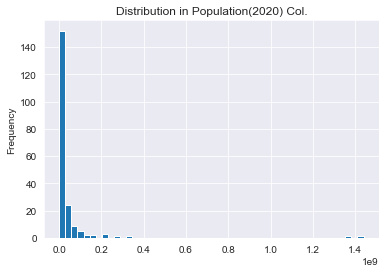

In [6]:
# Distribution in population
df['Population (2020)'].plot(kind='hist',bins=50)
plt.title("Distribution in Population(2020) Col.")
plt.show()

In [8]:
# Current population
df['Population(2022)'] = df['Population (2020)'] + df['Net Change']
df.head()

,Country/Other,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share,Population(2022)
0,Afghanistan,38928346,2.33,886592,60,652860,-62920,4.6,18,25.0,0.50,39814938
1,Albania,2877797,-0.11,-3120,105,27400,-14000,1.6,36,63.0,0.04,2874677
2,Algeria,43851044,1.85,797990,18,2381740,-10000,3.1,29,73.0,0.56,44649034
3,Angola,32866272,3.27,1040977,26,1246700,6413,5.6,17,67.0,0.42,33907249
4,Antigua and Barbuda,97929,0.84,811,223,440,0,2.0,34,26.0,0.00,98740


In [7]:
# Total population of world till 2022, March

print("Total population of world till 2022, March: {}".format(df['Population(2022)'].sum()))

Total population of world till 2022, March: 7875428648


In [11]:
data = go.Choropleth(
    locations= df['Country/Other'],
    z = df['Population(2022)'],
    text = df['Country/Other'],
    locationmode='country names',
    colorscale=[[0, 'rgb(225,255,255)'],
                        [0.01, 'rgb(166,206,227)'], [0.02, 'rgb(31,125,180)'],
                        [0.03, 'rgb(178,223,138)'], [0.10, 'rgb(51,160,44)'],
                        [0.30, 'rgb(251,144,143)'], [0.70, 'rgb(255,255,20)'],
                        [1, 'rgb(210,26,28)']],
    reversescale=False
)

layout = go.Layout(
    title='World Population in 2022',
    autosize=False,
    width=1100,
    height=500,
    geo= dict(
        showframe=False,
        showcoastlines=False,
        projection_type='natural earth1'
    ),

)

fig = go.Figure(data=[data], layout=layout)
fig.show()

Ranking countries based on population

In [13]:
# Ranking countries based on their population
df['Ranking (Population)'] = df['Population(2022)'].rank(ascending=False)
df['Ranking (Population)'] = df['Ranking (Population)'].astype('int')

In [14]:
population_wise = df.sort_values(by='Ranking (Population)').head(10)

population_wise

,Country/Other,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share,Population(2022),Ranking (Population)
36,China,1439323776,0.39,5540090,153,9388211,-348399,1.7,38,61.0,18.47,1444863866,1
82,India,1380004385,0.99,13586631,464,2973190,-532687,2.2,28,35.0,17.70,1393591016,2
191,United States,331002651,0.59,1937734,36,9147420,954806,1.8,38,83.0,4.25,332940385,3
83,Indonesia,273523615,1.07,2898047,151,1811570,-98955,2.3,30,56.0,3.51,276421662,4
136,Pakistan,220892340,2.00,4327022,287,770880,-233379,3.6,23,35.0,2.83,225219362,5
23,Brazil,212559417,0.72,1509890,25,8358140,21200,1.7,33,88.0,2.73,214069307,6
131,Nigeria,206139589,2.58,5175990,226,910770,-60000,5.4,18,52.0,2.64,211315579,7
13,Bangladesh,164689383,1.01,1643222,1265,130170,-369501,2.1,28,39.0,2.11,166332605,8
147,Russia,145934462,0.04,62206,9,16376870,182456,1.8,40,74.0,1.87,145996668,9
116,Mexico,128932753,1.06,1357224,66,1943950,-60000,2.1,29,84.0,1.65,130289977,10


In [15]:
colors = ['red',] * 15
colors[0] = 'darkred'
colors[1] = 'darkred'
colors[7] = 'tomato'
colors[8] = 'tomato'
colors[9] ='tomato'



data = [
    go.Bar(
        x = population_wise['Population(2022)'], 
        y= population_wise['Ranking (Population)'], 
        orientation='h',
        text = population_wise['Country/Other'],
        marker_color = colors
    )
]

layout = go.Layout(
    title=dict(text='Ten Highest Populated Countries'),
    xaxis={'title':'Population in 2022', 'side':'top'},
    yaxis = {'title':'Rank', 'autorange':'reversed'},
    height=700,
    hovermode='closest'
)
fig = go.Figure(data = data, layout=layout)

fig.update_traces(textposition='outside')
fig.update_yaxes(type='category')

fig.show()

### Yearly Change

In [13]:
# Countries with highest Yearly Change
df.sort_values(by='Yearly Change', ascending=False).head(15)

,Country/Other,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share,Population(2022),Ranking (Population)
130,Niger,24206644,3.84,895929,19,1266700,4000,7.0,15,17.0,0.31,25102573,56
12,Bahrain,1701575,3.68,60403,2239,760,47800,2.0,32,89.0,0.02,1761978,152
54,Equatorial Guinea,1402985,3.47,46999,50,28050,16000,4.6,22,73.0,0.02,1449984,153
187,Uganda,45741007,3.32,1471413,229,199810,168694,5.0,17,26.0,0.59,47212420,30
3,Angola,32866272,3.27,1040977,26,1246700,6413,5.6,17,67.0,0.42,33907249,43
47,DR Congo,89561403,3.19,2770836,40,2267050,23861,6.0,17,46.0,1.15,92332239,16
27,Burundi,11890784,3.12,360204,463,25680,2001,5.5,17,14.0,0.15,12250988,78
110,Mali,20250833,3.02,592802,17,1220190,-40000,5.9,16,44.0,0.26,20843635,60
33,Chad,16425864,3.00,478988,13,1259200,2000,5.8,17,23.0,0.21,16904852,72
177,Tanzania,59734218,2.98,1728755,67,885800,-40076,4.9,18,37.0,0.77,61462973,23


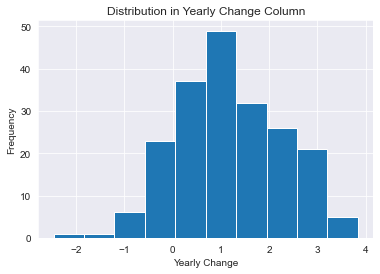

In [14]:
df['Yearly Change'].plot.hist()
plt.xlabel('Yearly Change')
plt.title("Distribution in Yearly Change Column")
plt.show()

In [15]:
df['Ranking (Yearly Change)'] = df['Yearly Change'].rank(ascending=0)
df['Ranking (Yearly Change)'] = df['Ranking (Yearly Change)'].astype('int')

In [22]:
df.sort_values(by='Ranking (Yearly Change)').head(15)

,Country/Other,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share,Population(2022),Ranking (Population),Ranking (Yearly Change)
130,Niger,24206644,3.84,895929,19,1266700,4000,7.0,15,17.0,0.31,25102573,56,1
12,Bahrain,1701575,3.68,60403,2239,760,47800,2.0,32,89.0,0.02,1761978,152,2
54,Equatorial Guinea,1402985,3.47,46999,50,28050,16000,4.6,22,73.0,0.02,1449984,153,3
187,Uganda,45741007,3.32,1471413,229,199810,168694,5.0,17,26.0,0.59,47212420,30,4
3,Angola,32866272,3.27,1040977,26,1246700,6413,5.6,17,67.0,0.42,33907249,43,5
47,DR Congo,89561403,3.19,2770836,40,2267050,23861,6.0,17,46.0,1.15,92332239,16,6
27,Burundi,11890784,3.12,360204,463,25680,2001,5.5,17,14.0,0.15,12250988,78,7
110,Mali,20250833,3.02,592802,17,1220190,-40000,5.9,16,44.0,0.26,20843635,60,8
33,Chad,16425864,3.00,478988,13,1259200,2000,5.8,17,23.0,0.21,16904852,72,9
177,Tanzania,59734218,2.98,1728755,67,885800,-40076,4.9,18,37.0,0.77,61462973,23,10


In [51]:
yearly_change_wise = df.sort_values(by='Ranking (Yearly Change)').head(10)

fig = px.bar(
    yearly_change_wise,
    x = 'Ranking (Yearly Change)',
    y = 'Yearly Change',
    color = 'Country/Other',
    text = 'Country/Other',
    title='Top 10 Countries with Highest Yearly Change'
)

fig.update_traces(textposition='outside')
fig.update_layout(showlegend=False)
fig.show()

### Density (P/Km2)

TypeError: 'str' object is not callable

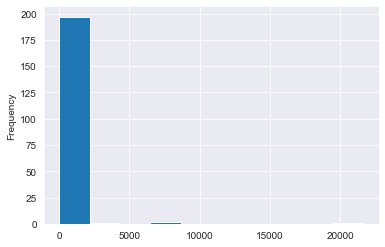

In [24]:
# Distriabution in Density (P/Km2)
df['Density (P/Km²)'].plot.hist()
plt.title("Distribution in Density (P/Km2) column")
plt.xlabel("Density (P/Km2)")
plt.show()

In [23]:
# Most densly Populated Countries
df['Ranking (most_densly_populated)'] = df['Density (P/Km²)'].rank(ascending=0)
df['Ranking (most_densly_populated)'] = df['Ranking (most_densly_populated)'].astype('int')
df.sort_values(by='Ranking (most_densly_populated)').head(15)

,Country/Other,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share,Population(2022),Ranking (Population),Ranking (Yearly Change),Ranking (most_densly_populated)
105,Macao,649335,1.39,8890,21645,30,5000,1.2,39,100.0,0.01,658225,167,81,1
158,Singapore,5850342,0.79,46005,8358,700,27028,1.2,42,100.0,0.08,5896347,114,127,2
79,Hong Kong,7496981,0.82,60827,7140,1050,29308,1.3,45,100.0,0.10,7557808,104,124,3
12,Bahrain,1701575,3.68,60403,2239,760,47800,2.0,32,89.0,0.02,1761978,152,2,4
109,Maldives,540544,1.81,9591,1802,300,11370,1.9,30,35.0,0.01,550135,174,60,5
111,Malta,441543,0.27,1171,1380,320,900,1.5,43,93.0,0.01,442714,175,159,6
13,Bangladesh,164689383,1.01,1643222,1265,130170,-369501,2.1,28,39.0,2.11,166332605,8,106,7
34,Channel Islands,173863,0.93,1604,915,190,1351,1.5,43,30.0,0.00,175467,191,114,8
169,State of Palestine,5101414,2.41,119994,847,6020,-10563,3.7,21,80.0,0.07,5221408,121,40,9
117,Micronesia,548914,1.00,5428,784,700,-2957,2.9,27,68.0,0.01,554342,173,108,10


In [26]:
mostDenslyPopulated = df.sort_values(by='Ranking (most_densly_populated)').head(15)

fig = px.bar(
    mostDenslyPopulated,
    y = 'Ranking (most_densly_populated)',
    x = 'Density (P/Km²)',
    color = 'Country/Other',
    text = 'Country/Other',
    orientation='h'
)

fig.update_layout(title="Fifteen Most Densly Populated Countries", showlegend=False, yaxis={'autorange':'reversed'})
fig.update_traces(textposition='outside')
fig.update_yaxes(type='category')
fig.show()

In [84]:
df.index

RangeIndex(start=0, stop=201, step=1)

In [16]:
df1 = df.copy()
df1 = df1.sort_values(by='Density (P/Km²)').reset_index().drop(columns='index')
df1['Rank (by least dense population)'] = df1.index +1

In [18]:
df1 = df1[['Country/Other', 'Rank (by least dense population)']]

df1

,Country/Other,Rank (by least dense population)
0,Mongolia,1
1,Western Sahara,2
2,Australia,3
3,Iceland,4
4,Namibia,5
...,...,...
196,Maldives,197
197,Bahrain,198
198,Hong Kong,199
199,Singapore,200


In [19]:
df = pd.merge(df, df1, how='outer', on='Country/Other')
df.head(15)

,Country/Other,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share,Population(2022),Ranking (Population),Rank (by least dense population)
0,Afghanistan,38928346,2.33,886592,60,652860,-62920,4.6,18,25.0,0.50,39814938,37,75
1,Albania,2877797,-0.11,-3120,105,27400,-14000,1.6,36,63.0,0.04,2874677,140,114
2,Algeria,43851044,1.85,797990,18,2381740,-10000,3.1,29,73.0,0.56,44649034,34,31
3,Angola,32866272,3.27,1040977,26,1246700,6413,5.6,17,67.0,0.42,33907249,43,45
4,Antigua and Barbuda,97929,0.84,811,223,440,0,2.0,34,26.0,0.00,98740,201,148
5,Argentina,45195774,0.93,415097,17,2736690,4800,2.3,32,93.0,0.58,45610871,32,27
6,Armenia,2963243,0.19,5512,104,28470,-4998,1.8,35,63.0,0.04,2968755,138,113
7,Aruba,106766,0.43,452,593,180,201,1.9,41,44.0,0.00,107218,197,186
8,Australia,25499884,1.18,296686,3,7682300,158246,1.8,38,86.0,0.33,25796570,55,3
9,Austria,9006398,0.57,51296,109,82409,65000,1.5,43,57.0,0.12,9057694,98,118


In [22]:
least_densly_populated_countries = df.sort_values(by='Rank (by least dense population)').head(10)
least_densly_populated_countries

,Country/Other,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share,Population(2022),Ranking (Population),Rank (by least dense population)
119,Mongolia,3278290,1.65,53123,2,1553560,-852,2.9,28,67.0,0.04,3331413,135,1
197,Western Sahara,597339,2.55,14876,2,266000,5582,2.4,28,87.0,0.01,612215,170,2
8,Australia,25499884,1.18,296686,3,7682300,158246,1.8,38,86.0,0.33,25796570,55,3
81,Iceland,341243,0.65,2212,3,100250,380,1.8,37,94.0,0.00,343455,181,4
124,Namibia,2540905,1.86,46375,3,823290,-4806,3.4,22,55.0,0.03,2587280,143,5
76,Guyana,786552,0.48,3786,4,196850,-6000,2.5,27,27.0,0.01,790338,164,6
102,Libya,6871292,1.38,93840,4,1759540,-1999,2.3,29,78.0,0.09,6965132,107,7
31,Canada,37742154,0.89,331107,4,9093510,242032,1.5,41,81.0,0.48,38073261,38,8
62,French Guiana,298682,2.70,7850,4,82200,1200,3.4,25,87.0,0.00,306532,183,9
22,Botswana,2351627,2.08,47930,4,566730,3000,2.9,24,73.0,0.03,2399557,145,10


In [27]:
fig = px.bar(
    least_densly_populated_countries,
    x = 'Rank (by least dense population)',
    y = 'Density (P/Km²)',
    color='Country/Other',
    text= 'Country/Other',

)

fig.update_layout(
    showlegend=False,
    xaxis=dict(title='Rank'),
    title='Countries with leaset dense population',
    bargap=0.3,
    height=500,
    width=1000)

fig.update_traces(textposition='outside')
fig.update_xaxes(type='category')

fig.show()

### Land Area

In [40]:
df.columns

Index(['Country/Other', 'Population (2020)', 'Yearly Change', 'Net Change',
       'Density (P/Km²)', 'Land Area (Km²)', 'Migrants (net)', 'Fert. Rate',
       'Med. Age', 'Urban Pop %', 'World Share', 'Population(2022)',
       'Ranking (Population)'],
      dtype='object')

In [75]:
# Ranking countries based on the Land Area(Km2)
df['Rank (by Land Area)'] = df['Land Area (Km²)'].rank(ascending=False)
df['Rank (by Land Area)'] = df['Rank (by Land Area)'].astype('int')

In [76]:
df.sort_values(by='Rank (by Land Area)').head(10)

,Country/Other,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share,Population(2022),Ranking (Population),Ranking (Yearly Change),Ranking (most_densly_populated),Rank (by least dense population),Rank (by Land Area)
147,Russia,145934462,0.04,62206,9,16376870,182456,1.8,40,74.0,1.87,145996668,9,172,186,15,1
36,China,1439323776,0.39,5540090,153,9388211,-348399,1.7,38,61.0,18.47,1444863866,1,153,62,140,2
191,United States,331002651,0.59,1937734,36,9147420,954806,1.8,38,83.0,4.25,332940385,3,139,149,53,3
31,Canada,37742154,0.89,331107,4,9093510,242032,1.5,41,81.0,0.48,38073261,38,120,193,8,4
23,Brazil,212559417,0.72,1509890,25,8358140,21200,1.7,33,88.0,2.73,214069307,6,132,162,40,5
8,Australia,25499884,1.18,296686,3,7682300,158246,1.8,38,86.0,0.33,25796570,55,95,198,4,6
82,India,1380004385,0.99,13586631,464,2973190,-532687,2.2,28,35.0,17.70,1393591016,2,110,21,181,7
5,Argentina,45195774,0.93,415097,17,2736690,4800,2.3,32,93.0,0.58,45610871,32,114,176,26,8
92,Kazakhstan,18776707,1.21,225280,7,2699700,-18000,2.8,31,58.0,0.24,19001987,64,91,189,13,9
2,Algeria,43851044,1.85,797990,18,2381740,-10000,3.1,29,73.0,0.56,44649034,34,58,172,30,10


In [21]:
# Rank based on fertility
df['Ranking (Fertility)'] = df['Fert. Rate'].rank(ascending=False)
df['Ranking (Fertility)'] = df['Ranking (Fertility)'].astype('int')

In [22]:
# Rank based on emigrants
df['Ranking (Emigrants)'] = df['Migrants (net)'].rank(ascending=1)
df['Ranking (Emigrants)'] = df['Ranking (Emigrants)'].astype('int')

In [23]:
# Rank based on immigrants
df['Ranking (Immigrants)'] = df['Migrants (net)'].rank(ascending=0)
df['Ranking (Immigrants)'] = df['Ranking (Immigrants)'].astype('int')

In [24]:
# Rank based on Urban Population
df['Ranking (Urban Pop)'] = df['Urban Pop %'].rank(ascending=1)
df['Ranking (Urban Pop)'] = df['Ranking (Urban Pop)'].astype('int')

In [25]:
# Rank based on population density
df['Ranking (Density)'] = df['Density (P/Km²)'].rank(ascending=False)
df['Ranking (Density)'] = df['Ranking (Density)'].astype('int')

,Country/Other,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share,Population(2022),Ranking (Population),Ranking (Area),Ranking (Fertility),Ranking (Emigrants),Ranking (Immigrants),Ranking (Urban Pop),Ranking (Yearly Pop. Change),Ranking (Density)
0,Afghanistan,38928346,2.33,886592,60,652860,-62920,4.6,18,25.0,0.50,39814938,37,40,22,16,186,178,41,127
1,Albania,2877797,-0.11,-3120,105,27400,-14000,1.6,36,63.0,0.04,2874677,140,145,165,48,154,91,181,88
2,Algeria,43851044,1.85,797990,18,2381740,-10000,3.1,29,73.0,0.56,44649034,34,10,59,53,148,64,58,172
3,Angola,32866272,3.27,1040977,26,1246700,6413,5.6,17,67.0,0.42,33907249,43,22,6,148,54,82,5,157
4,Antigua and Barbuda,97929,0.84,811,223,440,0,2.0,34,26.0,0.00,98740,201,191,122,116,86,176,123,54
5,Argentina,45195774,0.93,415097,17,2736690,4800,2.3,32,93.0,0.58,45610871,32,8,96,142,60,9,114,176
6,Armenia,2963243,0.19,5512,104,28470,-4998,1.8,35,63.0,0.04,2968755,138,140,143,73,129,91,163,89
7,Aruba,106766,0.43,452,593,180,201,1.9,41,44.0,0.00,107218,197,200,131,120,82,142,150,16
8,Australia,25499884,1.18,296686,3,7682300,158246,1.8,38,86.0,0.33,25796570,55,6,143,193,9,27,95,198
9,Austria,9006398,0.57,51296,109,82409,65000,1.5,43,57.0,0.12,9057694,98,115,175,185,17,108,141,84


In [24]:
# Ranking based on yearly population change
df['Ranking (Yearly Pop. Change)'] = df['Yearly Change'].rank(ascending=False)
df['Ranking (Yearly Pop. Change)'] = df['Ranking (Yearly Pop. Change)'].astype('int')

In [36]:
# Rank based on Median age
df['Ranking (Median Age)'] = df['Med. Age'].rank(ascending=1) # starts from younger group
df['Ranking (Median Age)'] = df['Ranking (Median Age)'].astype('int')

In [26]:
df.describe()

Index(['Country/Other', 'Population (2020)', 'Yearly Change', 'Net Change',
       'Density (P/Km²)', 'Land Area (Km²)', 'Migrants (net)', 'Fert. Rate',
       'Med. Age', 'Urban Pop %', 'World Share', 'Population(2022)',
       'Ranking (Population)', 'Ranking (Area)', 'Ranking (Fertility)',
       'Ranking (Emigrants)', 'Ranking (Immigrants)', 'Ranking (Urban Pop)',
       'Ranking (Yearly Pop. Change)', 'Ranking (Density)'],
      dtype='object')

In [27]:
df.sort_values(by='Ranking (Emigrants)', ascending=1).head(10)

,Country/Other,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share,Population(2022),Ranking (Population),Ranking (Area),Ranking (Fertility),Ranking (Emigrants),Ranking (Immigrants),Ranking (Urban Pop),Ranking (Yearly Pop. Change),Ranking (Density)
195,Venezuela,28435940,-0.28,-79889,32,882050,-653249,2.3,30,0.0,0.36,28356051,51,32,96,1,201,198,188,152
82,India,1380004385,0.99,13586631,464,2973190,-532687,2.2,28,35.0,17.70,1393591016,2,7,104,2,200,162,110,21
174,Syria,17500658,2.52,430523,95,183630,-427391,2.8,26,60.0,0.22,17931181,67,88,72,3,199,97,32,95
13,Bangladesh,164689383,1.01,1643222,1265,130170,-369501,2.1,28,39.0,2.11,166332605,8,95,112,4,198,151,106,7
36,China,1439323776,0.39,5540090,153,9388211,-348399,1.7,38,61.0,18.47,1444863866,1,2,155,5,197,96,153,62
136,Pakistan,220892340,2.00,4327022,287,770880,-233379,3.6,23,35.0,2.83,225219362,5,35,50,6,196,162,50,39
165,South Sudan,11193725,1.19,131612,18,610952,-174200,4.7,19,25.0,0.14,11325337,83,43,18,7,195,178,94,172
123,Myanmar,54409800,0.67,364380,83,653290,-163313,2.2,29,31.0,0.70,54774180,27,39,104,8,194,167,134,106
200,Zimbabwe,14862924,1.48,217456,38,386850,-116858,3.6,19,38.0,0.19,15080380,74,60,50,9,193,154,75,148
83,Indonesia,273523615,1.07,2898047,151,1811570,-98955,2.3,30,56.0,3.51,276421662,4,14,96,10,192,114,102,64


In [28]:
df.sort_values(by='Ranking (Immigrants)', ascending=1).head(10)

,Country/Other,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share,Population(2022),Ranking (Population),Ranking (Area),Ranking (Fertility),Ranking (Emigrants),Ranking (Immigrants),Ranking (Urban Pop),Ranking (Yearly Pop. Change),Ranking (Density)
191,United States,331002651,0.59,1937734,36,9147420,954806,1.8,38,83.0,4.25,332940385,3,3,143,201,1,36,139,149
67,Germany,83783942,0.32,266897,240,348560,543822,1.6,46,76.0,1.07,84050839,19,63,165,200,2,55,157,46
184,Turkey,84339067,1.09,909452,110,769630,283922,2.1,32,76.0,1.08,85248519,17,36,112,199,3,55,100,83
190,United Kingdom,67886011,0.53,355839,281,241930,260650,1.8,40,83.0,0.87,68241850,21,79,143,198,4,36,142,41
31,Canada,37742154,0.89,331107,4,9093510,242032,1.5,41,81.0,0.48,38073261,38,4,175,197,5,40,120,193
37,Colombia,50882891,1.08,543448,46,1109500,204796,1.8,31,80.0,0.65,51426339,28,25,143,196,6,43,101,142
147,Russia,145934462,0.04,62206,9,16376870,182456,1.8,40,74.0,1.87,145996668,9,1,143,195,7,59,172,186
187,Uganda,45741007,3.32,1471413,229,199810,168694,5.0,17,26.0,0.59,47212420,30,84,11,194,8,176,4,50
8,Australia,25499884,1.18,296686,3,7682300,158246,1.8,38,86.0,0.33,25796570,55,6,143,193,9,27,95,198
88,Italy,60461826,-0.15,-88249,206,294140,148943,1.3,47,69.0,0.78,60373577,24,72,192,192,10,73,183,58


In [29]:
df.sort_values(by='Ranking (Fertility)').head(10)

,Country/Other,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share,Population(2022),Ranking (Population),Ranking (Area),Ranking (Fertility),Ranking (Emigrants),Ranking (Immigrants),Ranking (Urban Pop),Ranking (Yearly Pop. Change),Ranking (Density)
130,Niger,24206644,3.84,895929,19,1266700,4000,7.0,15,17.0,0.31,25102573,56,20,1,139,62,192,1,169
162,Somalia,15893222,2.92,450317,25,627340,-40000,6.1,17,47.0,0.20,16343539,73,41,2,25,177,134,14,162
47,DR Congo,89561403,3.19,2770836,40,2267050,23861,6.0,17,46.0,1.15,92332239,16,11,3,167,35,137,6,145
110,Mali,20250833,3.02,592802,17,1220190,-40000,5.9,16,44.0,0.26,20843635,60,23,4,25,177,142,8,176
33,Chad,16425864,3.00,478988,13,1259200,2000,5.8,17,23.0,0.21,16904852,72,21,5,133,68,183,9,183
3,Angola,32866272,3.27,1040977,26,1246700,6413,5.6,17,67.0,0.42,33907249,43,22,6,148,54,82,5,157
27,Burundi,11890784,3.12,360204,463,25680,2001,5.5,17,14.0,0.15,12250988,78,146,7,135,67,193,7,22
131,Nigeria,206139589,2.58,5175990,226,910770,-60000,5.4,18,52.0,2.64,211315579,7,30,8,17,184,126,25,52
65,Gambia,2416668,2.94,68962,239,10120,-3087,5.3,18,59.0,0.03,2485630,144,164,9,82,120,100,11,48
26,Burkina Faso,20903273,2.86,581895,76,273600,-25000,5.2,18,31.0,0.27,21485168,59,73,10,36,166,167,15,112


In [30]:
df.describe()

,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share,Population(2022),Ranking (Population),Ranking (Area),Ranking (Fertility),Ranking (Emigrants),Ranking (Immigrants),Ranking (Urban Pop),Ranking (Yearly Pop. Change),Ranking (Density)
count,2.010000e+02,201.000000,2.010000e+02,201.000000,2.010000e+02,201.000000,201.000000,201.000000,201.000000,201.000000,2.010000e+02,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,3.877661e+07,1.200299,4.046234e+05,361.711443,6.450903e+05,-5.442786,2.692040,30.621891,57.557214,0.497463,3.918124e+07,101.000000,100.995025,100.726368,100.905473,100.905473,100.756219,100.820896,100.830846
std,1.454245e+08,1.091574,1.210610e+06,1710.321831,1.809408e+06,123292.057588,1.264253,9.119557,24.430881,1.865678,1.464553e+08,58.167861,58.160596,58.033781,58.174874,58.157081,58.146756,58.160362,58.106293
min,9.792900e+04,-2.470000,-3.838400e+05,2.000000,3.000000e+01,-653249.000000,1.100000,15.000000,0.000000,0.000000,9.874000e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.886198e+06,0.420000,4.103000e+03,34.000000,2.164000e+04,-10047.000000,1.700000,22.000000,39.000000,0.020000,1.865653e+06,51.000000,51.000000,50.000000,51.000000,51.000000,51.000000,51.000000,51.000000
50%,8.654622e+06,1.080000,6.040300e+04,89.000000,1.085600e+05,-960.000000,2.300000,30.000000,59.000000,0.110000,8.702507e+06,101.000000,101.000000,96.000000,101.000000,101.000000,100.000000,101.000000,100.000000
75%,2.769102e+07,1.960000,3.602040e+05,228.000000,4.988000e+05,9741.000000,3.600000,39.000000,78.000000,0.360000,2.835605e+07,151.000000,151.000000,155.000000,151.000000,151.000000,151.000000,151.000000,151.000000
max,1.439324e+09,3.840000,1.358663e+07,21645.000000,1.637687e+07,954806.000000,7.000000,48.000000,100.000000,18.470000,1.444864e+09,201.000000,201.000000,201.000000,201.000000,201.000000,198.000000,201.000000,200.000000


In [32]:
df.sort_values(by='Ranking (Urban Pop)').head(15)

,Country/Other,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share,Population(2022),Ranking (Population),Ranking (Area),Ranking (Fertility),Ranking (Emigrants),Ranking (Immigrants),Ranking (Urban Pop),Ranking (Yearly Pop. Change),Ranking (Density)
149,Réunion,895312,0.72,6385,358,2500,-1256,2.3,36,100.0,0.01,901697,162,175,96,97,105,1,132,28
16,Belgium,11589623,0.44,50295,383,30280,48000,1.7,42,98.0,0.15,11639918,81,139,155,182,20,2,148,25
145,Qatar,2881053,1.73,48986,248,11610,40000,1.9,32,96.0,0.04,2930039,139,161,131,177,24,4,62,44
186,U.S. Virgin Islands,104425,-0.15,-153,298,350,-451,2.0,43,96.0,0.00,104272,199,195,122,109,93,4,183,38
192,Uruguay,3473730,0.35,11996,20,175020,-3000,2.0,36,96.0,0.04,3485726,134,90,122,83,119,4,154,167
72,Guam,168775,0.89,1481,313,540,-506,2.3,31,95.0,0.00,170256,192,188,96,107,95,6,120,35
81,Iceland,341243,0.65,2212,3,100250,380,1.8,37,94.0,0.00,343455,181,105,143,122,80,7,136,198
5,Argentina,45195774,0.93,415097,17,2736690,4800,2.3,32,93.0,0.58,45610871,32,8,96,142,60,9,114,176
87,Israel,8655535,1.60,136158,400,21640,10000,3.0,30,93.0,0.11,8791693,99,151,61,152,49,9,68,24
111,Malta,441543,0.27,1171,1380,320,900,1.5,43,93.0,0.01,442714,175,197,175,125,76,9,159,6


In [42]:
df.sort_values(by='Ranking (Median Age)', ascending=0).head(20)

,Country/Other,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,...,Population(2022),Ranking (Population),Ranking (Area),Ranking (Fertility),Ranking (Emigrants),Ranking (Immigrants),Ranking (Urban Pop),Ranking (Yearly Pop. Change),Ranking (Density),Ranking (Median Age)
90,Japan,126476461,-0.30,-383840,347,364555,71560,1.4,48,92.0,...,126092621,11,62,185,186,16,12,190,30,201
112,Martinique,375265,-0.08,-289,354,1060,-960,1.9,47,92.0,...,374976,180,179,131,101,101,12,180,29,199
88,Italy,60461826,-0.15,-88249,206,294140,148943,1.3,47,69.0,...,60373577,24,72,192,192,10,73,183,58,199
69,Greece,10423054,-0.48,-50401,81,128900,-16000,1.3,46,85.0,...,10372653,87,96,192,44,158,31,193,109,197
143,Portugal,10196709,-0.29,-29478,111,91590,-6000,1.3,46,66.0,...,10167231,90,109,192,66,135,85,189,81,197
67,Germany,83783942,0.32,266897,240,348560,543822,1.6,46,76.0,...,84050839,19,63,165,200,2,55,157,46,197
103,Lithuania,2722289,-1.35,-37338,43,62674,-32780,1.7,45,71.0,...,2684951,142,123,155,30,172,69,200,143,193
25,Bulgaria,6948445,-0.74,-51674,64,108560,-4800,1.6,45,76.0,...,6896771,108,101,165,75,126,55,198,125,193
166,Spain,46754778,0.04,18002,94,498800,40000,1.3,45,80.0,...,46772780,31,51,192,177,24,43,172,97,193
79,Hong Kong,7496981,0.82,60827,7140,1050,29308,1.3,45,0.0,...,7557808,104,180,192,170,32,198,124,3,193


In [43]:
df.loc[df['Country/Other']=='India']

,Country/Other,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,...,Population(2022),Ranking (Population),Ranking (Area),Ranking (Fertility),Ranking (Emigrants),Ranking (Immigrants),Ranking (Urban Pop),Ranking (Yearly Pop. Change),Ranking (Density),Ranking (Median Age)
82,India,1380004385,0.99,13586631,464,2973190,-532687,2.2,28,35.0,...,1393591016,2,7,104,2,200,162,110,21,84


# References:
- [Our World in Data](https://ourworldindata.org/age-structure)
- [Databank](https://databank.worldbank.org/metadataglossary/population-estimates-and-projections/series/SM.POP.NETM#:~:text=Net%20migration%20is%20the%20number,for%20the%20five%2Dyear%20period)
- [Worldometers](https://www.worldometers.info/world-population/population-by-country/)
- [Worldatlas](https://www.worldatlas.com/articles/countries-with-the-lowest-median-age.html#:~:text=Low%20median%20age%20in%20some,towards%20reducing%20the%20infant%20deaths.)